# 2. Preprocessing

Welcome to the second part of our tutorial.
This notebook will teach you how to preprocess a sensor based Human Activity Recognition dataset.

Data preprocessing is an essential part of any Deep Learning project. In this part you 
To be able to choose the correct preprocessing steps, first we need to get to know our data. However, this topic has already been dealt with in Chapter 1.

In the first part we will work on the same subset, that we already had been working with in Chapter 1.
So let's start by reading in the dataset.

Welcome to the second notebook of our six part series part of our tutorial on Deep Learning for Human Activity Recognition. Within the last notebook you learned:

- How do I use Google Colab and Jupyter Notebooks? 
- How do I load a dataset using pandas?
- How do I analyze the labeling? How do I plot sample activity data?
- What are sample, more detailled analysis that one can apply on a HAR dataset?

This notebook will teach you everything you need to know about preprocessing. Sensor datasets in their raw form are (usually) very messy. This notebook will teach you which preprocessing steps can or should be executed on a dataset, in order to train a working classifer, i.e. our neural network architecture, which we will define in later notebooks. 

After completing this notebook you will be answer the following questions:
- What data cleaning steps usually need to be performed on a raw sensor dataset?
- How and why do we perform scaling/normalization?
- What is a sliding window? How do we apply it?

## 2.1. Important Remarks

If you are accessing this tutorial via [Google Colab](https://colab.research.google.com/github/mariusbock/dl-for-har/blob/main/tutorial_notebooks/training.ipynb), first make sure to use Google Colab in English. This will help us to better assist you with issues that might arise during the tutorial. There are two ways to change the default language if it isn't English already:
1. On Google Colab, go to `Help` -> `View in English`
2. Change the default language of your browser to `English`.

To also ease the communication when communicating errors, enable line numbers within the settings of Colab.

1. On Google Colab, go to `Tools` -> `Settings` -> `Editor` -> `Show line numbers`

In general, we strongly advise you to use Google Colab as it provides you with a working Python distribution as well as free GPU resources. To make Colab use GPUs, you need to change the current notebooks runtime type via:

- `Runtime` -> `Change runtime type` -> `Dropdown` -> `GPU` -> `Save`

**Hint:** you can auto-complete code in Colab via `ctrl` + `spacebar`

For the live tutorial, we require all participants to use Colab. If you decide to rerun the tutorial at later points and rather want to have it run locally on your machine, feel free to clone our [GitHub repository](https://github.com/mariusbock/dl-for-har).

To get started with this notebook, you need to first run the code cell below. Please set `use_colab` to be `True` if you are accessing this notebook via Colab. If not, please set it to `False`. This code cell will make sure that imports from our GitHub repository will work.

In [3]:
import os, sys

use_colab = True

module_path = os.path.abspath(os.path.join('..'))

if use_colab:
    # move to content directory and remove directory for a clean start
    %cd /content/
    %rm -rf dl-for-har
    # clone package repository (will throw error if already cloned)
    !git clone https://github.com/mariusbock/dl-for-har.git
    # navigate to dl-for-har directory
    %cd dl-for-har/
else:
    os.chdir(module_path)

# this statement is needed so that we can use the methods of the DL-ARC pipeline
if module_path not in sys.path:
    sys.path.append(module_path)

[Errno 2] No such file or directory: '/content/'
/Users/ahoelzemann/Documents/git/dl-for-har/tutorial_notebooks/dl-for-har
Cloning into 'dl-for-har'...
remote: Enumerating objects: 1123, done.
remote: Counting objects: 100% (1123/1123), done.
remote: Compressing objects: 100% (765/765), done.
remote: Total 1123 (delta 574), reused 868 (delta 348), pack-reused 0
Receiving objects: 100% (1123/1123), 34.66 MiB | 11.48 MiB/s, done.
Resolving deltas: 100% (574/574), done.
Updating files: 100% (263/263), done.
/Users/ahoelzemann/Documents/git/dl-for-har/tutorial_notebooks/dl-for-har/dl-for-har


## 2.2. Reading the dataset

Before getting into the actual content of this notebook, we need to load the data again. Instead of using the same way as previously and loading the dataset we will use a predefined method of the DL-ARC feature stack called `load_dataset()`. Since the method returns [numpy](https://numpy.org/) arrays we also need to adjust our workflow from now on to index arrays according to [numpy](https://numpy.org/) syntax. If you want to familiarise yourself how to index check out this [webpage](https://numpy.org/doc/stable/reference/arrays.indexing.html).

### Task 1: Loading the data

1. Load the `rwhar_3sbjs` data using the load_dataset function. The function is already imported for you. (`lines 8-9`)
2. The method returns additional attributes. Have a look at them. You can also print them to see what values they have.

In [4]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from data_processing.preprocess_data import load_dataset


# load the dataset using the load_dataset() function; pass the method the name of the dataset as a string
X, y, num_classes, class_names, sampling_rate, has_null =

# since the method returns features and labels separately, we need to concat them
# since y is
data = np.concatenate((X, y[:, None]), axis=1)

print('\nShape of the dataset:')
print(data.shape)
print(data)

Processing dataset files ...
Full dataset with size: | X (659260, 4) | y (659260,) | 
 ..from file data/rwhar_3sbjs_data.csv

Shape of the dataset:
(659260, 5)
[[ 0.          0.37828386 10.168175    0.8475474   1.        ]
 [ 0.          0.38367084 10.172364    0.8499416   1.        ]
 [ 0.          0.37229836 10.181941    0.8595184   1.        ]
 ...
 [ 2.         -1.0540473  10.114903    0.3716998   5.        ]
 [ 2.         -1.0582372  10.109517    0.35075054  5.        ]
 [ 2.         -1.0726024  10.138845    0.350152    5.        ]]


## 2.3. Cleaning


There can be several reasons why we need to clean up a dataset. For example, it is common that datasets has missing values.
These values need to be interpolated. PAMAP2 is one of the datasets that is used very frequently in scientific publications, which contains missing values.

An example to clean data from missing values, especially NaN-values, can be found in the file **data_precessing.preprocess.data.py**.

Also, it can be beneficial to clean a dataset from noisy data or from outliers.
But be careful with cleaning the data from noise or outlier, since it only is recommendable if the noise/outlier is not from any importance for the use case of your model.


In [5]:
import random
from data_processing.preprocess_data import replaceNaNValues
data_with_nan = data.copy()

for i in range(0, 10):
    fill_index = random.randint(1, 20)
    data_with_nan[fill_index] = [np.nan, np.nan, np.nan, np.nan, np.nan]

print(data_with_nan[:20])

[[ 0.          0.37828386 10.168175    0.8475474   1.        ]
 [        nan         nan         nan         nan         nan]
 [ 0.          0.37229836 10.181941    0.8595184   1.        ]
 [ 0.          0.3429694  10.170568    0.8343793   1.        ]
 [ 0.          0.3196259  10.159795    0.81881696  1.        ]
 [ 0.          0.32561144 10.160394    0.82240826  1.        ]
 [ 0.          0.3585317  10.181941    0.82719666  1.        ]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [ 0.          0.3890578  10.175357    0.81343     1.        ]
 [ 0.          0.37229836 10.173561    0.842759    1.        ]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan]
 [ 0.          0.40940848 10.19092     0.82779527  1.  

In [6]:
participant_interpolated = replaceNaNValues(data_with_nan[:,0], 'int')
acc_x_interpolated = replaceNaNValues(data_with_nan[:,1])
acc_y_interpolated = replaceNaNValues(data_with_nan[:,2])
acc_z_interpolated = replaceNaNValues(data_with_nan[:,3])
label_interpolated = replaceNaNValues(data_with_nan[:,4], 'int')

data_interpolated = np.array([participant_interpolated, acc_x_interpolated, acc_y_interpolated, acc_z_interpolated, label_interpolated]).T
print(data_interpolated[:20])

[[ 0.          0.37828386 10.168175    0.8475474   1.        ]
 [ 0.          0.3752911  10.175058    0.8535329   1.        ]
 [ 0.          0.37229836 10.181941    0.8595184   1.        ]
 [ 0.          0.3429694  10.170568    0.8343793   1.        ]
 [ 0.          0.3196259  10.159795    0.81881696  1.        ]
 [ 0.          0.32561144 10.160394    0.82240826  1.        ]
 [ 0.          0.3585317  10.181941    0.82719666  1.        ]
 [ 0.          0.37379473 10.178649    0.82031333  1.        ]
 [ 0.          0.38142627 10.177003    0.81687164  1.        ]
 [ 0.          0.3890578  10.175357    0.81343     1.        ]
 [ 0.          0.37229836 10.173561    0.842759    1.        ]
 [ 0.          0.3908534  10.1822405   0.83527714  1.        ]
 [ 0.          0.40013093 10.186581    0.8315362   1.        ]
 [ 0.          0.40476972 10.18875     0.8296657   1.        ]
 [ 0.          0.4070891  10.189835    0.82873046  1.        ]
 [ 0.          0.40940848 10.19092     0.82779527  1.  

## 2.4. Resampling

Resampling is necessary if we work with data from sensors that did record with different sampling rates.
Resampling can either be done by up- or downsample the data.

An example for a function that either up- or downsamples time series data, can be found as well in our collection of preprocessing functions: **data_precessing.preprocess.data.py**.

## 2.5. Scaling

Scaling is in an important part in the preprocessing chain, but can also the reason for many mistakes.

### 2.5.1 How to (re)scale?

We should have a look on our dataset before we apply rescaling.

However, we will first reduce our dataset to only one subject.

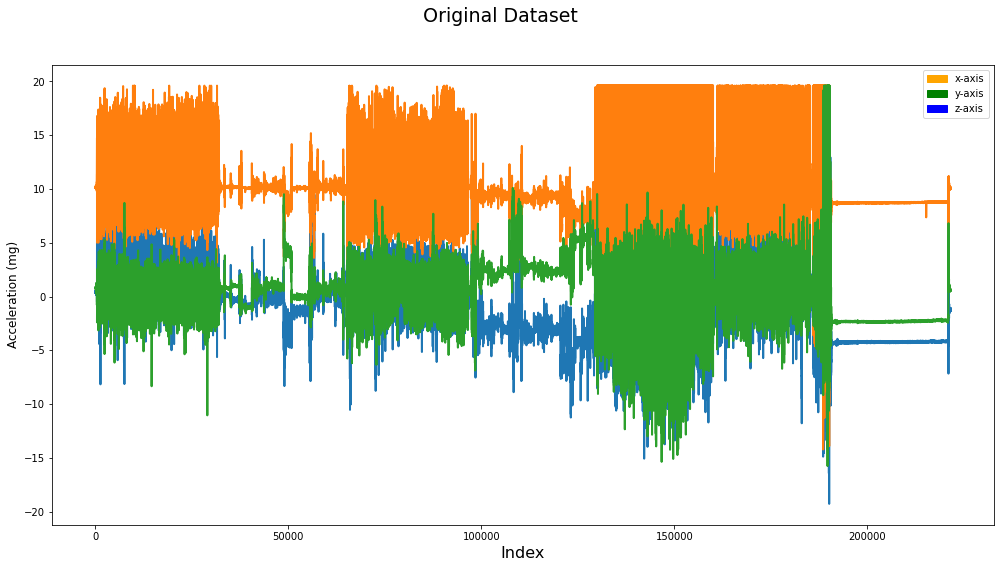

In [7]:
#Please reduce your dataset to only one subject and plot the data by executing this code cell.
from data_processing.plotting import plot_data

data = data[data[:, 0] == 0]
plot_data(data[:,1:4], 'Original Dataset')

This plot shows our unpreprocessed 3D accelerometer data.

Depending on how we organize our dataset before applying rescaling, the outcome differs a lot.
To illustrate this problem, we prepared the following example.
In this example we separated our data into one array for every type of activity before we applied rescaling.

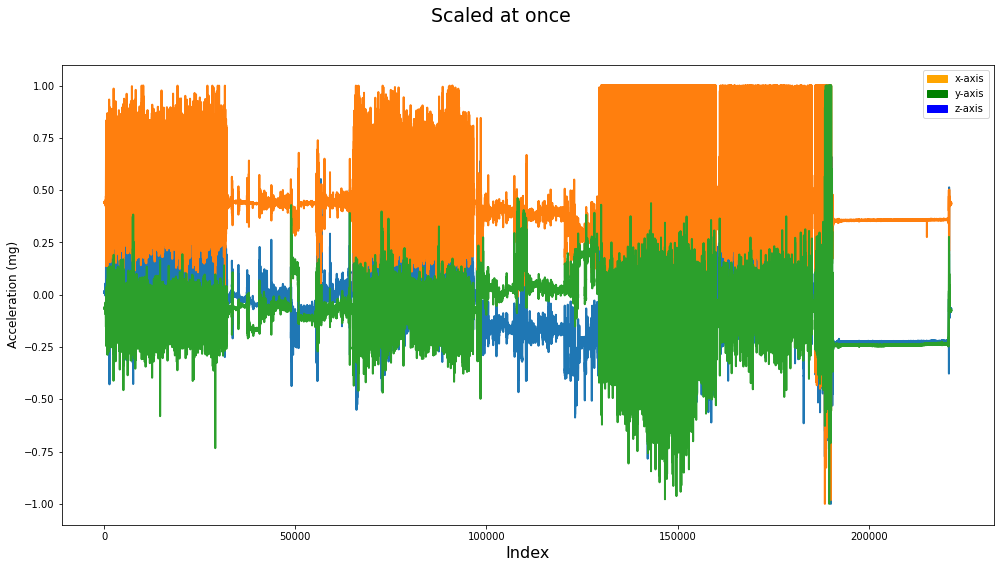

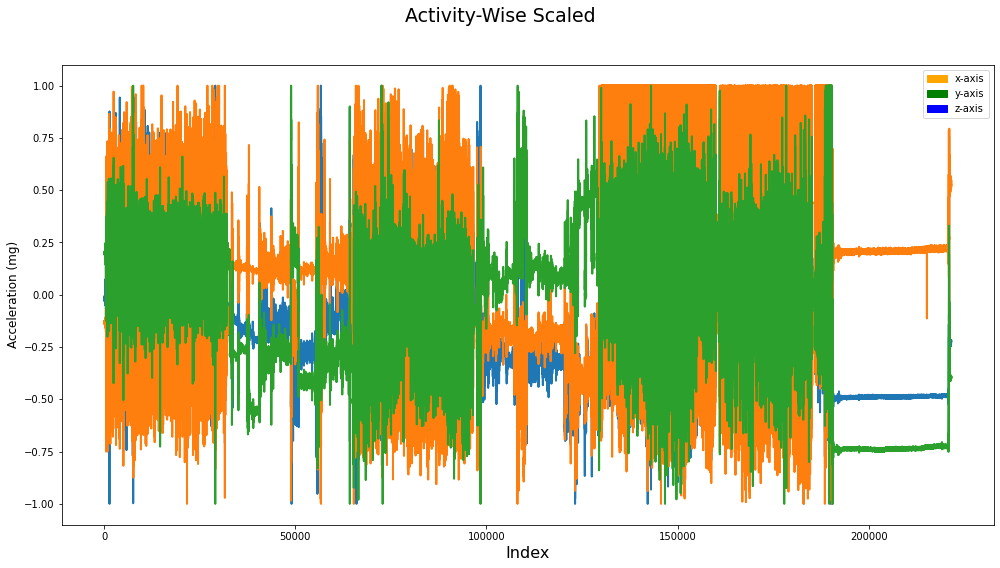

In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler(feature_range=[-1,1])
data_activity_wise = {}
data_activity_wise_scaled = []
all_activites = pd.unique(pd.Series(data[:, -1]))

for activity in all_activites:
    data_activity_wise[activity] = data[data[:, -1] == activity]

for activity, activity_data in data_activity_wise.items():
    data_activity_wise_scaled.append(scaler.fit_transform(activity_data[:, 1:4]))

scaled_data = scaler.fit_transform(data[:, 1:4])
data_scaled_at_once = np.concatenate((scaled_data, data[:, -1][:, None]), axis=1)
data_activity_wise = np.concatenate(data_activity_wise_scaled)

plot_data(data_scaled_at_once[:, 0:3], "Scaled at once")
plot_data(data_activity_wise, 'Activity-Wise Scaled')

This was kind of an "unrealistic" toy example and probably not so many programmers make this mistake.
However, this rule also applies when our dataset consists of different inertial sensors.

The following image shows how our datasets are often organized. We have a 2D matrix that contains the data from different sensor axes and inertial sensors.
However, accelerometer, gyroscopes, magnetometer or any other sensor do not share
the same boundaries. Furthermore, the boundaries also depend on the sensitivity used while recording the data.

![](https://github.com/mariusbock/dl-for-har/blob/main/images/pamap2_values_example.png?raw=true)

The numerical values of the magnetometer are much higher than accelerometer and gyroscope values. If we train our network with this data,
the magnetometer data will have a much higher importance than the accelerometer and gyroscope.

Unfortunately, scaling all sensor data together, will keep this imbalance, but we can break this up by rescaling data sensor wise.
## 2.6. Jumping/Sliding Window

In order to be able to feed our neural network with data, we need to organize it into smaller windows.
Therefore, we apply a jumping/sliding window algorithm with which we are able to split our time series data into chunks that our input layer can work with.

As already described in the slides, the algorithm has the parameter overlap_ratio. This parameter describes how much of the data of each window should overlap with the window before.

It is generally assumed that due to the higher number of data points, overlapping sliding windows increase the performance of HAR classifiers compared to non-overlapping ones [20], and they are not prone to missing important events [21], particularly within activity transition periods.

### Task 2: Applying different sliding windows

1. The RWHAR dataset has a sampling rate of 50 Hz. Using the function below, apply a sliding window on top of RWHAR dataset whose windows are 2 seconds long. Set the overlap ratio to be 0%. What are the dimensions of the resulting dataset? (`lines 34-38`)
2. Change the overlap ratio of the slding window to 25%. What differences can you see and what do you think you need to be aware of when using an `overlap_ratio`? (`lines 40-43`)

In [9]:
def sliding_window_samples(data, samples_per_window, overlap_ratio):
    """
    Return a sliding window measured in number of samples over a data array.

    :param data: input array, can be numpy or pandas dataframe
    :param samples_per_window: window length as number of samples
    :param overlap_ratio: overlap is meant as percentage and should be an integer value
    :return: tuple of windows and indices
    """
    windows = []
    indices = []
    curr = 0
    win_len = int(samples_per_window)
    if overlap_ratio is not None:
        overlapping_elements = int((overlap_ratio / 100) * (win_len))
        if overlapping_elements >= win_len:
            print('Number of overlapping elements exceeds window size.')
            return
    while curr < len(data) - win_len:
        windows.append(data[curr:curr + win_len])
        indices.append([curr, curr + win_len])
        curr = curr + win_len - overlapping_elements
    try:
        result_windows = np.array(windows)
        result_indices = np.array(indices)
    except:
        result_windows = np.empty(shape=(len(windows), win_len, data.shape[1]), dtype=object)
        result_indices = np.array(indices)
        for i in range(0, len(windows)):
            result_windows[i] = windows[i]
            result_indices[i] = indices[i]
    return result_windows, result_indices

# apply the sliding_window_samples() function on top of the data
# samples_per_window shall be equivalent to two seconds; overlap_ratio shall be 0%
print("Shape of the windowed dataset (2 seconds with 0% overlap):")
windowed_data, _ = sliding_window_samples(data, 100, 0)
print(windowed_data.shape)

# change the overlap_ratio shall to be 25%; What do you need to be aware of?
windowed_data, _ =
print("\nShape of the windowed dataset (2 seconds with 25% overlap):")
print(windowed_data.shape)

Shape of the windowed dataset (2 seconds with 0% overlap):
(2216, 100, 5)

Shape of the windowed dataset (2 seconds with 25% overlap):
(2954, 100, 5)


# References:

[1] Lets Not Stick together